In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

#N_list = [2** (2 + i) for i in range(1,13)]
#N_list = [8, 16, 32, 64, 80,100, 105, 110, 115, 120, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
N_list = [100, 200, 350,500, 1000, 2000, 4000, 5000, 10000, 20000, 40000, 60000]

print(N_list)
epoch_list = [30000]
seed_list = np.arange(1234, 1242)
#seed_list = [1234]
epochs = epoch_list[0]

precision_list = []

df = pd.DataFrame(columns = ['train', 'test', 'metrics', 'times'])
df_summary = pd.DataFrame(columns = ['err', 'texec'])

# x \in [1,8]
# y \in [-2,2]
# t \in [0,20]
Dim = 7 * 4 * 20

for N in N_list:
    precision_list.append(N ** (1/3) / Dim ** (1/3))
    for seed in seed_list:
        
        name = 'results/' + 'seed' + str(seed) + '_N'+ str(N) + '_epochs' + str(epochs) + '_size1'
        my_dict = np.load(name + '.npy', allow_pickle = True)

        texec = my_dict.item().get('texec')
        pointsec = my_dict.item().get('pointsec')
        train = my_dict.item().get('train')
        test = my_dict.item().get('test')
        
        metrics_u = my_dict.item().get('metrics_u')
        metrics_v = my_dict.item().get('metrics_v')
        metrics_p = my_dict.item().get('metrics_p')
        lambda_1 = my_dict.item().get('lambda_1').ravel()
        lambda_2 = my_dict.item().get('lambda_2').ravel()
        err = 1/2* (metrics_u[-1] + metrics_v[-1])
        times = my_dict.item().get('times')

        n = times.shape[0]
        min_index = test.argmin()
        diff = np.abs(train - test) / np.abs(test)
        
        train_min = train[min_index]
        test_min = test[min_index]
        diff_min = np.abs(train_min - test_min) / np.abs(test_min)
        df1 = pd.DataFrame({
                'N': n * [N],
                'seed': n * [seed],
                'train': train,
                'test': test,
                'metrics_u': metrics_u,
                'metrics_v': metrics_v,
                'metrics_p': metrics_p,
                'metrics': err,
                'lambda_1': lambda_1,
                'lambda_2': lambda_2,
                'times': times,
                'iteration' : np.arange(n) * 500,
                'pointsec': pointsec
            })
        
        df2 = pd.DataFrame({
            'N': [N],
            'seed': [seed],
            'err': [err],
            'texec': [texec],
            'pointsec': [pointsec],
            'diff_min': [diff_min]
        })
        
        df = pd.concat([df, df1])
        df_summary = pd.concat([df2, df_summary])
        
        


df = df.reset_index(drop=True)
df_summary = df_summary.reset_index(drop=True)
    
df['N'] = df['N'].astype(int).astype("category")
df['seed'] = df['seed'].astype("category")
df_summary['N'] = df_summary['N'].astype(int).astype("category")
df_summary['seed'] = df_summary['seed'].astype("category")
#seed1234_N40000_epochs30000.npy

df['error_lambda_1'] = np.abs(df['lambda_1']- 1.0) 
df['error_lambda_2'] = np.abs(df['lambda_2'] - 0.01)/0.01
df['error_lambda'] = 1/2 * (df['error_lambda_1'] + df['error_lambda_2'])


[100, 200, 350, 500, 1000, 2000, 4000, 5000, 10000, 20000, 40000, 60000]


In [3]:
rgb = [(236, 0, 84), (254, 64, 18), (38, 174, 65), (44, 95, 177)]
rgb = [(e[0] / 255.0, e[1] / 255.0, e[2] / 255.0) for e in rgb]
cmap = sns.blend_palette(rgb, n_colors=4)

pink = rgb[0]
orange = rgb[1]
green = rgb[2]
blue = rgb[3]


orange = np.array([254, 64, 18]) / 255
green = np.array([38, 174, 65]) / 255
blue = np.array([44, 95, 177]) / 255
purple = np.array([11,54,156]) / 255

my_palette_train = sns.palettes.color_palette([purple, orange])


In [4]:
colors = [pink, pink,
          blue, blue,
         green, green, green, green, green, green, green, green]
my_palette = sns.blend_palette(colors, n_colors=12)
my_palette

[(0.9254901960784314, 0.0, 0.32941176470588235),
 (0.9254901960784314, 0.0, 0.32941176470588235),
 (0.1843598615916957, 0.3667051134179161, 0.6883967704728949),
 (0.17254901960784313, 0.37254901960784315, 0.6941176470588235),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137),
 (0.14901960784313725, 0.6823529411764706, 0.2549019607843137)]

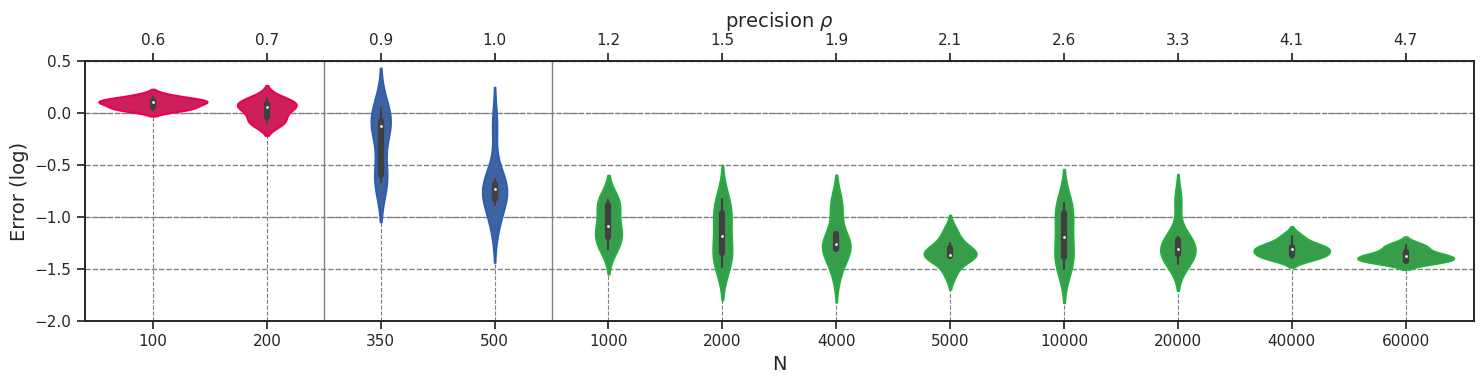

In [5]:
colors = [pink, pink,
          blue, blue,
         green, green, green, green, green, green, green, green]
my_palette = sns.blend_palette(colors, n_colors=12)
my_palette

df['pointsec_log'] = np.log10(df['pointsec'])

#sns.set_style("whitegrid")
df_summary['err_log'] = np.log10(df_summary['err'])
sns.set(style="ticks")

f, ax = plt.subplots(1,1, figsize=(15,4))
ax.set_axisbelow(True)
g = sns.violinplot(data=df_summary, x = 'N', y = 'err_log', ax=ax, width=-0.95, palette=my_palette)

ax.grid(color='gray', linestyle='dashed')
ax.set_facecolor('white') 
ax.set_xlabel(r'N', fontsize=14)
ax.set_ylabel(r'Error (log)', fontsize=14)

ax.axhline(0, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-1, linestyle='--', color='grey',lw=0.8, zorder=-1)
ax.axhline(-2, linestyle='--', color='grey',lw=0.8, zorder=-1)
#ax.axhline(-4, linestyle='--', color='grey',lw=0.8, zorder=-1)

ax.axvline(1.5, linestyle='-', color='grey',lw=1, zorder=-1)
ax.axvline(3.5, linestyle='-', color='grey',lw=1, zorder=-1)

plt.grid(axis='x')

plt.ylim(-2,0.5)
plt.xlim(-.6,11.6)

# vertical plots
plt.plot([0,0], [-2,0],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([1,1], [-2,0],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([2,2], [-2,0],color='grey',linestyle='--', lw=0.8,zorder=-1)
plt.plot([3,3], [-2,0],color='grey',linestyle='--', lw=0.8,zorder=-1)

for i in range(4, 12):
    plt.plot([i,i], [-2,-1.5],color='grey',linestyle='--', lw=0.8,zorder=-1)

    
ax2 = ax.twiny()

new_tick_locations = np.arange(np.array(N_list).shape[0])
precision_list = np.array(precision_list)

def tick_function(X):
    return ["%.1f" % z for z in X]

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(precision_list))
ax2.set_xlabel(r"precision $\rho$", fontsize=14)


for i in range(12):
    g.collections[2 * i].set_edgecolor(my_palette[i])

    
#plt.subplots_adjust(bottom=0.1)
plt.tight_layout()
    
#plt.ylim(-2.25,1)
#plt.xlim(-.6,9.6)
plt.savefig('plots/transientNavierStokes.pdf')

In [9]:
precision_list

array([0.56312394, 0.70949171, 0.85498797, 0.96292839, 1.21321375,
       1.52855354, 1.92585679, 2.07456633, 2.61378979, 3.29316878,
       4.14913267, 4.74957126])

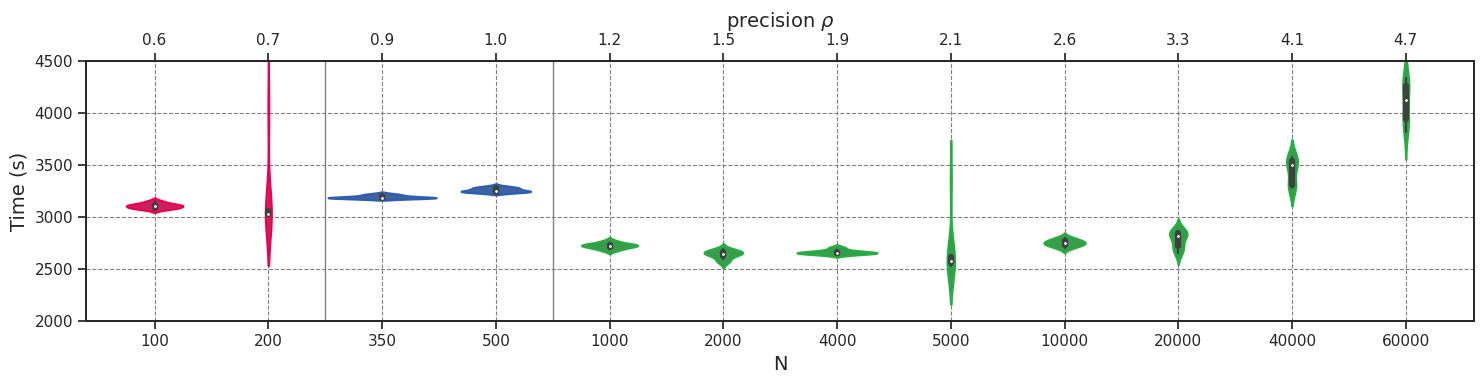

In [6]:
sns.set(style="ticks")

f, ax = plt.subplots(1,1, figsize=(15,4))
ax.set_axisbelow(True)
# oko con width!
g = sns.violinplot(data=df_summary, x = 'N', y = 'texec', palette=my_palette, ax=ax, width=-.95)


ax.set_xlabel(r'N', fontsize=14)
ax.set_ylabel(r'Time (s)', fontsize=14)

plt.grid(color='grey',linestyle='--', lw=0.8,zorder=-1)

ax.axvline(1.5, linestyle='-', color='grey',lw=1, zorder=-1)
ax.axvline(3.5, linestyle='-', color='grey',lw=1, zorder=-1)

plt.grid(color='grey',linestyle='--', lw=0.8,zorder=-1)

plt.ylim(2000,4500)
plt.xlim(-.6,11.6)



    
ax2 = ax.twiny()

new_tick_locations = np.arange(np.array(N_list).shape[0])
precision_list = np.array(precision_list)

def tick_function(X):
    return ["%.1f" % z for z in X]

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(precision_list))
ax2.set_xlabel(r"precision $\rho$", fontsize=14)


for i in range(12):
    g.collections[2 * i].set_edgecolor(my_palette[i])

    
#plt.subplots_adjust(bottom=0.1)
plt.tight_layout()
    
#plt.ylim(-2.25,1)
#plt.xlim(-.6,9.6)
plt.savefig('plots/timesNavierStokes.pdf')


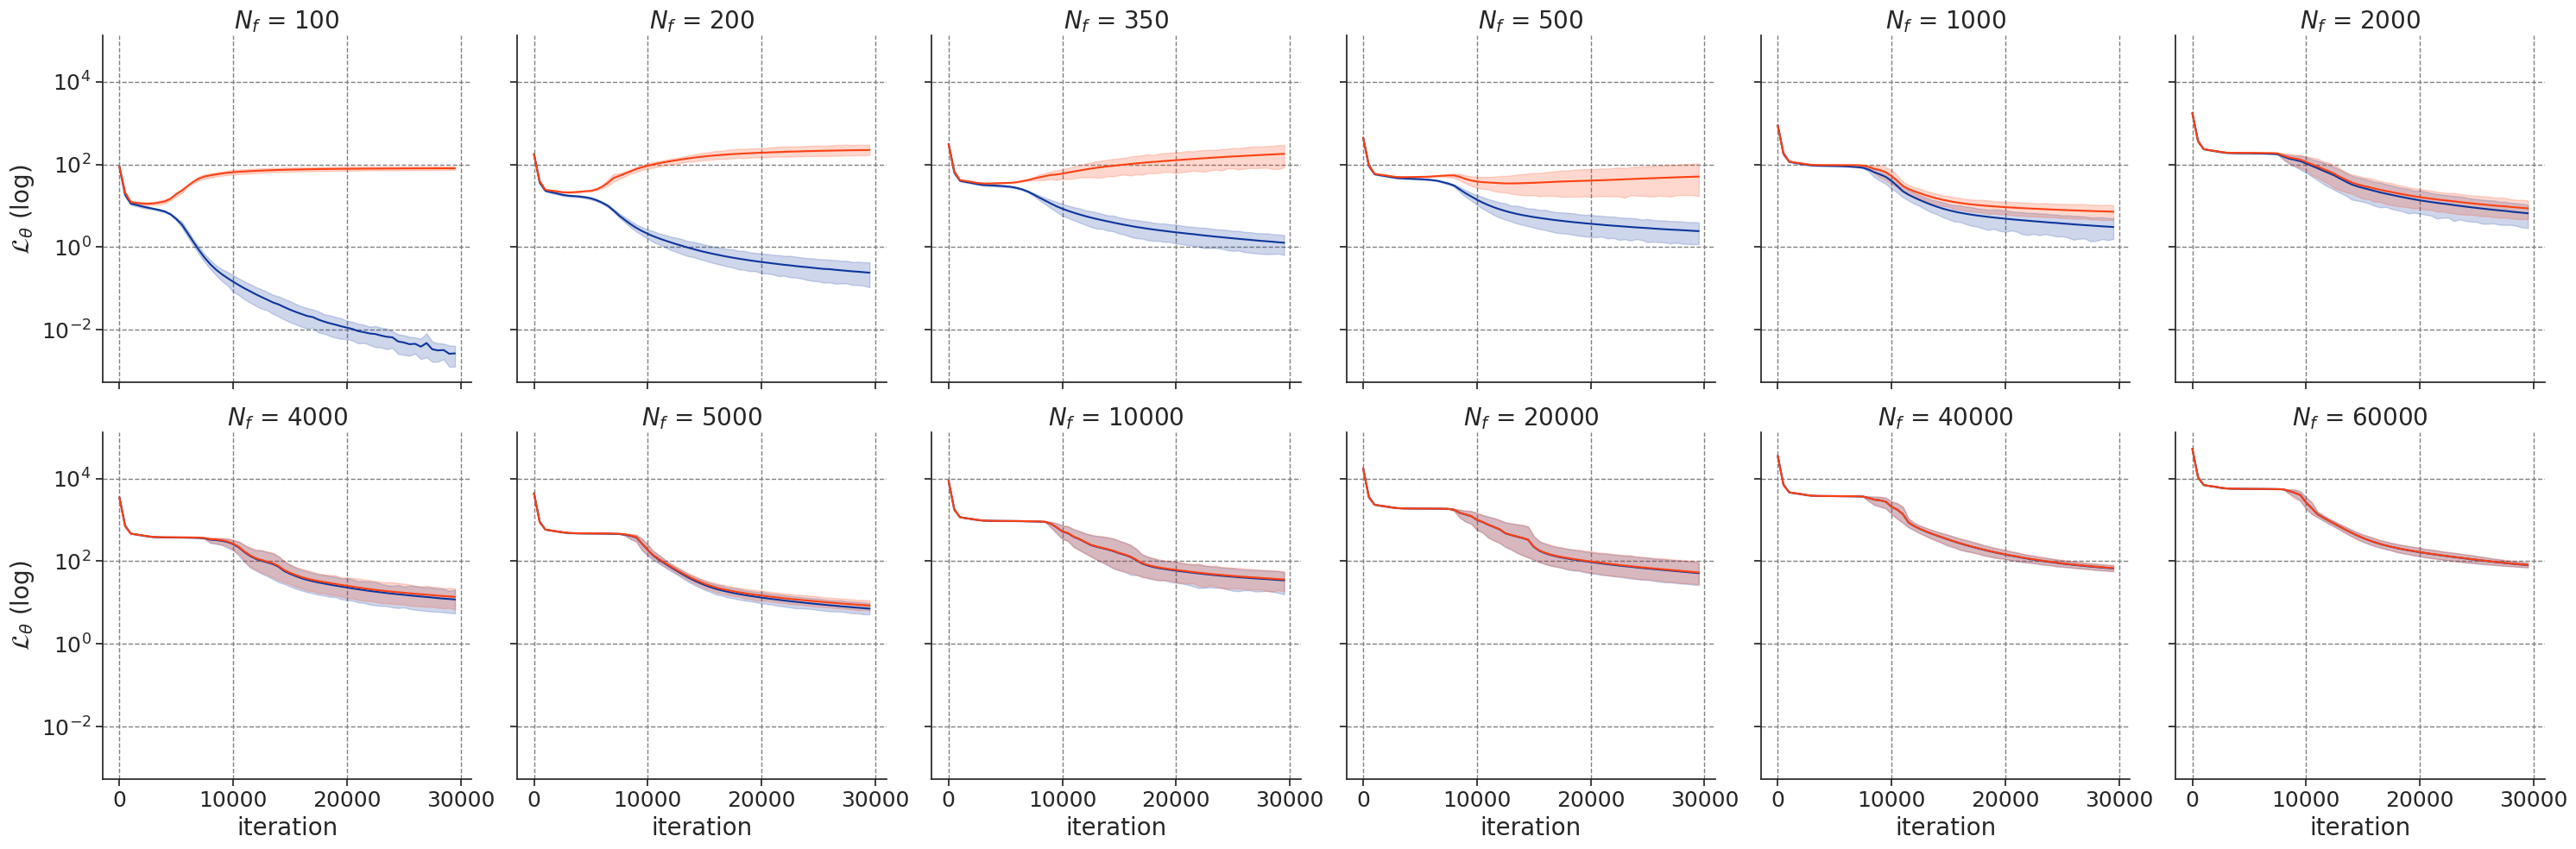

In [7]:
conv = df[["iteration", "N", "train", "test"]]
melt = pd.melt(conv, id_vars=["N", "iteration"], value_vars=["train", "test"])

g = sns.relplot(data=melt, x = 'iteration', y = 'value', hue="variable", kind = 'line', col ='N', legend=False, col_wrap=6,palette = my_palette_train)
g.set(yscale="log")
plt.grid(color='gray', linestyle='dashed')  #just add this

i = 0
for ax in g.axes.flatten():
    ax.grid(color='gray', linestyle='dashed')

    for j in range(2):
        line = ax.get_lines()[j]
        line.set_color(my_palette_train[j])

    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel(r'$\mathcal{L}_\theta$ (log)', fontsize=20)
    title = ax.get_title()
    title = r'$N_f$' + title[1:]
    ax.set_title(title, fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18)

    i += 1
    
plt.tight_layout()
plt.savefig('plots/lossesNavier.pdf')    

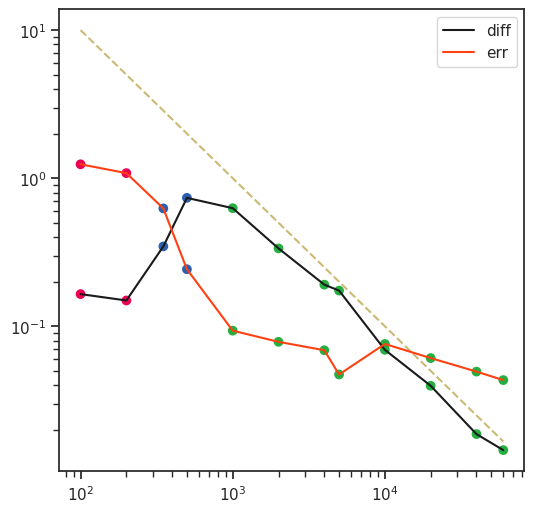

In [60]:
data = pd.pivot_table(data = df_summary, values = ["err", "diff_min"], index="N")

x = np.array(data.index.values, dtype=np.float)
y1 = data.diff_min.values
y2 = data.err.values

fig, ax = plt.subplots(1,1, figsize = (6,6))


ax.plot(x,y1, color = "k", label = "diff")
ax.scatter(x,y1, marker="o", color=my_palette)
ax.plot(x, 1000 * x**-1, "--y")


ax.plot(x,y2, color = orange, label = "err")
ax.scatter(x,y2, marker="o", color=my_palette)

ax.set_xscale('log')
ax.set_yscale('log')

#ax2.loglog(x, 1000 * x**-1)

#for i in range(x.shape[0]):
#    ax1.text(np.log10(x[i]), -1, x.astype(str)[i])
ax.legend()